<a href="https://colab.research.google.com/github/23AD083/MLOPS_INTERNSHIP/blob/main/STUDENT_GRADE_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊 Random Forest Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        76
           1       0.95      0.88      0.91        24

    accuracy                           0.96       100
   macro avg       0.96      0.93      0.94       100
weighted avg       0.96      0.96      0.96       100

Confusion Matrix:
[[75  1]
 [ 3 21]]



 


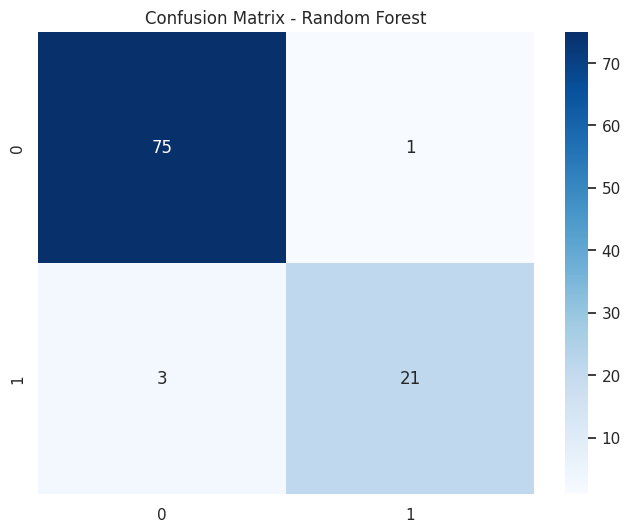

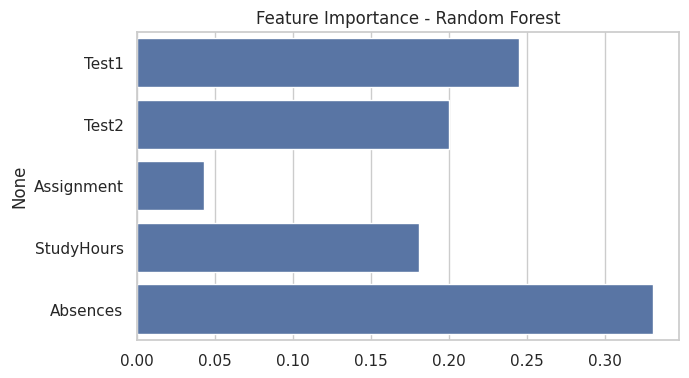



 CORREATION MATRIX 





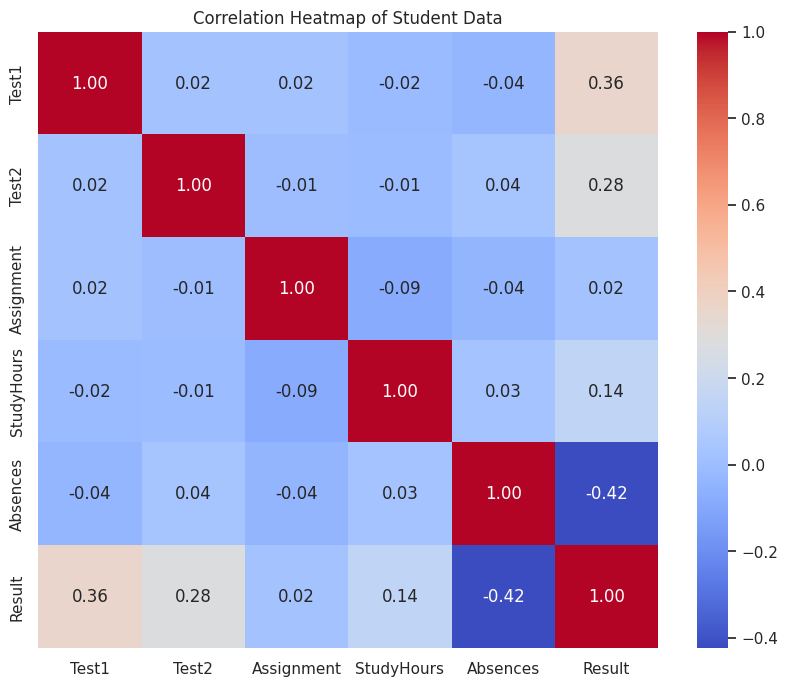

In [21]:
# 1. Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Load Dataset
df = pd.read_csv("student_pass_fail_large.csv")

# 3. Features and Labels
X = df[['Test1', 'Test2', 'Assignment', 'StudyHours', 'Absences']]
y = df['Result']

# 4. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,   random_state=42,  stratify=y)

# 5. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train Random Forest
rf_model = RandomForestClassifier(n_estimators=150, max_depth=8, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_preds = rf_model.predict(X_test_scaled)



# 8. Evaluate Both - Modify to evaluate only Random Forest
print("📊 Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_preds))
print("\n\n\n ")
# Visualize Confusion Matrix
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()
print("\n\n\n ")
# Add Feature Importance for Random Forest
importances_rf = rf_model.feature_importances_
features_rf = X.columns

plt.figure(figsize=(7,4))
sns.barplot(x=importances_rf, y=features_rf)
plt.title("Feature Importance - Random Forest")
plt.show()
print ("\n\n CORREATION MATRIX \n\n\n")
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Student Data')
plt.show()

In [22]:
# prompt: SAVE the model in the joblib file

!pip install joblib
import joblib

# Save the trained Random Forest model to a joblib file
filename = 'random_forest_model.joblib'
joblib.dump(rf_model, filename)

print(f"Model saved to {filename}")

# You can load the model later using:
# loaded_model = joblib.load(filename)

Model saved to random_forest_model.joblib


In [23]:
from google.colab import files

files.download('random_forest_model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>